In [1]:
import numpy as np
from sklearn.model_selection import KFold
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy
from matplotlib.collections import LineCollection
import os
import tifffile as tf
import math
from skimage import io

def find_files_with_prefix_and_type(directory, prefix, file_type):
    matching_files = []
    # Walk through the directory
    for root, dirs, files in os.walk(directory):
        # Filter files based on prefix and extension
        for file in files:
            if file.startswith(prefix) and file.endswith(file_type):
                matching_files.append(os.path.join(root, file))
    return matching_files

def projection_3d(data,x_scale,y_scale,z_scale,space,colormapname,caxis,projection_type,ifcolorbar,ifsave,savepath):
    # projection_type: 0-max;1-mean
    if projection_type == 0:
        data_px = np.max(data,0)
        data_py = np.max(data,1)
        data_pz = np.max(data,2)
    else:
        data_px = np.mean(data,0)
        data_py = np.mean(data,1)
        data_pz = np.mean(data,2)
    # plot
    x_scale = int(x_scale)
    y_scale = int(y_scale)
    z_scale = int(z_scale)
    plt.figure(figsize=(6,6))
    grid = plt.GridSpec(y_scale + z_scale + space, x_scale + z_scale + space)
    plt.subplot(grid[0:y_scale,0:x_scale])
    if len(caxis)>0:
        plt.imshow(data_pz,cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
    else:
        plt.imshow(data_pz,cmap = colormapname,aspect = 'auto')
    plt.xticks([]),plt.yticks([])
    plt.subplot(grid[0:y_scale,x_scale+space:x_scale+z_scale+space]) # y
    if len(caxis)>0:
        plt.imshow(data_py[:,::-1],cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
    else:
        plt.imshow(data_py[:,::-1],cmap = colormapname,aspect = 'auto')
    plt.xticks([]),plt.yticks([])
    plt.subplot(grid[y_scale+space:y_scale+z_scale+space,0:x_scale]) # x
    if len(caxis)>0:
        plt.imshow(np.transpose(data_px[:,::-1]),cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
    else:
        plt.imshow(np.transpose(data_px[:,::-1]),cmap = colormapname,aspect = 'auto')
    plt.xticks([]),plt.yticks([])
    if ifcolorbar:
        plt.subplot(grid[y_scale+space:y_scale+z_scale+space,x_scale+space:x_scale+z_scale+space]) 
        if len(caxis)>0:
            plt.imshow(data_py,cmap = colormapname,vmin = caxis[0],vmax = caxis[1],aspect = 'auto')
        else:
            plt.imshow(data_py,cmap = colormapname,aspect = 'auto')
        plt.xticks([]),plt.yticks([])
        plt.colorbar()
    if ifsave:
        plt.savefig(savepath, dpi = 300)
    plt.show()
    plt.close()

In [2]:
# load yy dim
result_path = os.path.abspath('../results/nsyb-G7f-rAch1h')
folder_name = 'voxel-integration-region-SRD-long-formal'
num_dim_file = 'list_list_num_dim.npy'
fly_selected_list = [0,1,2,3,4,5,6,7,8,9]
# parameters 
if_shuffle = False
thresh = np.arange(0,1,0.02)
channel = np.array([0,1,2])
num_channel_choice = len(channel)
dim_thresh = 25
file_folders = os.listdir(result_path)
print(file_folders)
num_fly = len(fly_selected_list)
yy = np.zeros((num_fly,num_channel_choice))
for i in range(num_fly):
    file_folder = file_folders[fly_selected_list[i]]
    the_path = result_path + '/' + file_folder + '/' + folder_name
    f = os.path.exists(the_path + '/' + num_dim_file)
    if not f:
        continue
    num_dim = np.load(the_path + '/' + num_dim_file)
    num_dim = np.squeeze(num_dim)
    if not if_shuffle:
        num_dim = num_dim[:,:,0]
    for j in range(num_channel_choice):
        a = np.where(np.squeeze(num_dim[j,:])>=dim_thresh)
        a = np.array(a[0])
        yy[i,j] = thresh[a[0]]

['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1', 'figures-for-revision1']


In [3]:
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly3/data',
                        '20230428-nsyb-G7f-rAch1h/fly1/data',
                        '20230507-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly3/data',
                        '20230515-nsyb-G7f-rAch1h/fly1/data']
file_folder_list_3 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', 
                 '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
dff0_thresh_list = [0.5,1,0.5,0.5,0.5,1,1,0.5,1,1]
# Ach
region_c2 = np.array([7,12,16,17,18,19,23,26,27,28,29,34,39,55,59,63,64,65,66,72,73,74,79,84])
# 'LH_R','ICL_R','CRE_R','MBPED_R','MBVL_R','MBML_R','EB','FB','SLP_R','SIP_R','SMP_R',
# 'AOTU_R','SCL-R','LH_L','ICL_L','CRE_L','MBPED_L','MBVL_L','MBML_L','SLP_L','SIP_L','SMP_L','AOTU_L','SCL_L'
region_plus = np.array([12,16,17,18,19,23,26,28,39,59,63,64,65,66,73,84])
# 'ICL_R','CRE_R','MBPED_R','MBVL_R','MBML_R','EB','FB','SIP_R',
# 'SCL-R','ICL_L','CRE_L','MBPED_L','MBVL_L','MBML_L','SIP_L','SCL_L'

# ## 5HT
# file_folder_list_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230506-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly4/data',
#                         '20230517-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly3/data',
#                         '20230603-nsyb-G7f-r5HT1.0/fly1/data']
# file_folder_list_3 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', '20230513-r5HT1.0-fly2', 
#                 '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4', '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', 
#                 '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']
# dff0_thresh_list = [1,1,1,1,1,1,1,1,1,1]
# # 5HT
# region_c2 = np.array([4,16,18,19,23,26,27,28,29,34,63,65,66,72,73,74,79])
# # 'NO','CRE_R','MBVL_R','MBML_R','EB','FB','SLP_R','SIP_R','SMP_R',
# # 'AOTU_R','CRE_L','MBVL_L','MBML_L','SLP_L','SIP_L','SMP_L','AOTU_L'
# region_plus = np.array([18,65])
# # MBVL

###
region_c1 = np.array([4,7,12,16,17,18,19,23,26,27,28,29,34,39,55,59,63,64,65,66,72,73,74,79,84])
# 'NO','LH_R','ICL_R','CRE_R','MBPED_R','MBVL_R','MBML_R','EB','FB','SLP_R','SIP_R','SMP_R',
# 'AOTU_R','SCL-R','LH_L','ICL_L','CRE_L','MBPED_L','MBVL_L','MBML_L','SLP_L','SIP_L','SMP_L',
# 'AOTU_L','SCL_L'

## 2.read data
data_path = '../../data'
result_path = '../../../results/nsyb-G7f-rAch1h-ensemble_weight'
file_name = ['dff0_-6-80_down2_C2','dff0_-6-80_down2_C3']
atlas_path = data_path
atlas_name = 'align_to_atlas/Transformed_atlas.tif'
atlas_eroded_name = 'align_to_atlas/Transformed_atlas_eroded_r5.tif'
num_fly = len(file_folder_list_1)
num_channel = 2
atlas_z_range = range(13,38)

In [4]:
if_save = True
fly_selected_list = [0,1,2,3,4,5,6,7,8,9]
channel_selected = [0,1,2,3]

load atlas done! size:
(256, 256, 25)
11898
155708
(11898, 155708)
(2520, 11898)
(3, 67)
(3, 155708)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


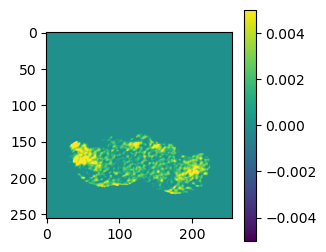

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


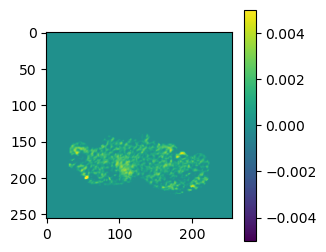

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


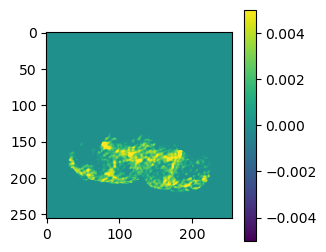

11898
155708
(11898, 155708)
(2520, 11898)
(3, 38)
(3, 155708)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


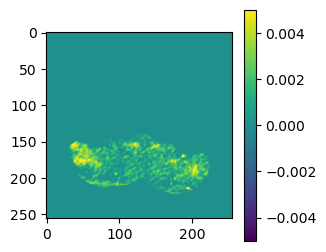

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


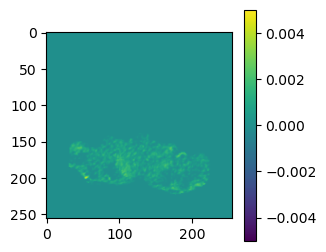

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


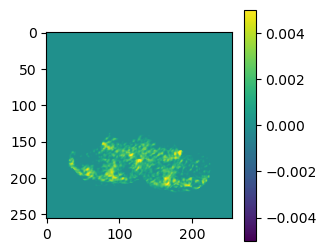

18702
154745
(18702, 154745)
(2520, 18702)
(3, 78)
(3, 154745)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


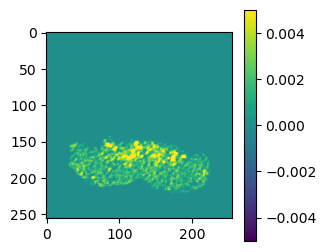

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


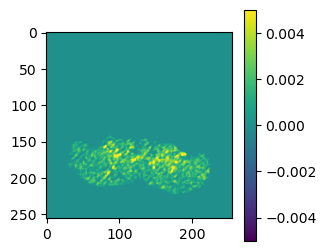

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


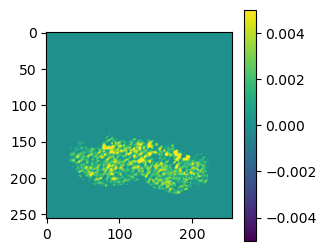

8331
78761
(8331, 78761)
(2520, 8331)
(3, 67)
(3, 78761)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


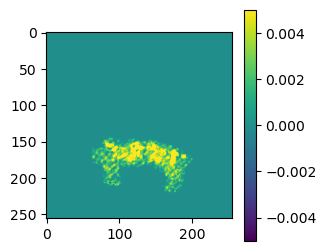

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


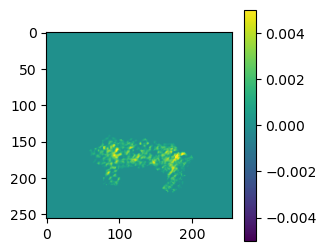

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_0_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


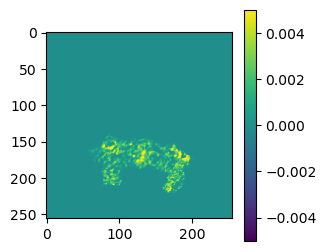

load atlas done! size:
(256, 256, 25)
12936
158389
(12936, 158389)
(2520, 12936)
(3, 55)
(3, 158389)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


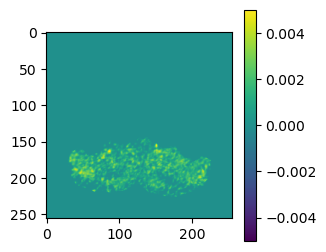

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


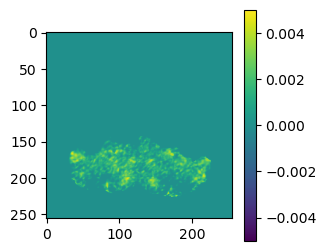

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


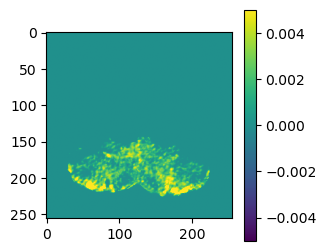

12936
158389
(12936, 158389)
(2520, 12936)
(3, 26)
(3, 158389)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


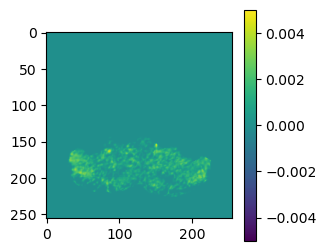

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


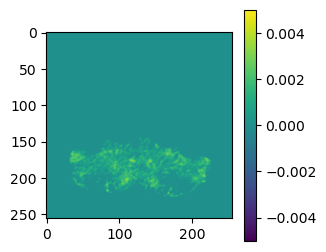

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


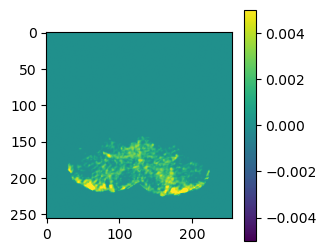

14598
157038
(14598, 157038)
(2520, 14598)
(3, 99)
(3, 157038)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


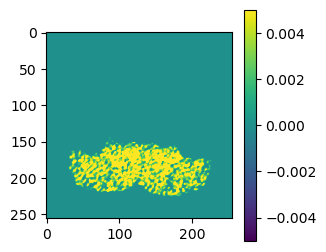

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


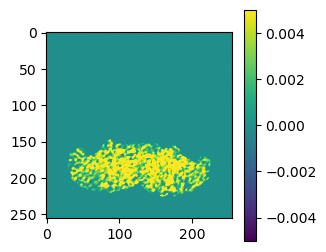

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


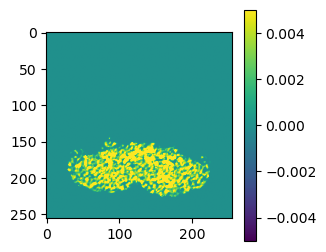

8618
89843
(8618, 89843)
(2520, 8618)
(3, 55)
(3, 89843)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


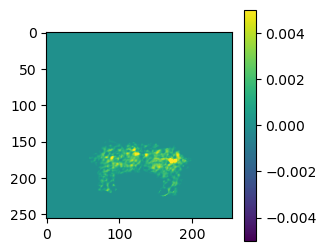

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


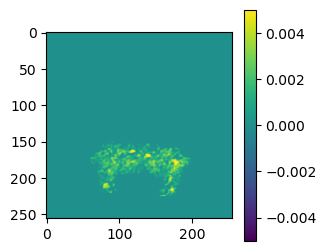

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_1_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


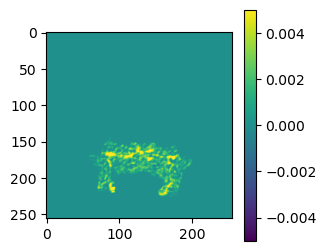

load atlas done! size:
(256, 256, 25)
19772
236823
(19772, 236823)
(2520, 19772)
(3, 24)
(3, 236823)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


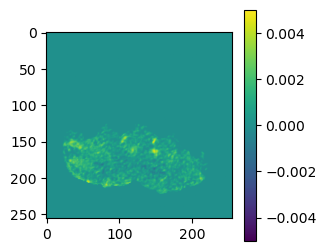

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


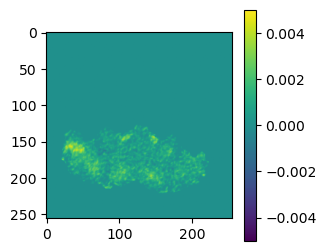

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


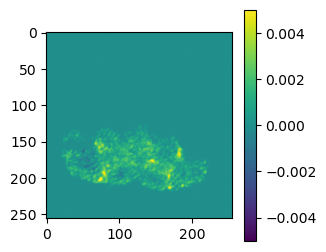

19772
236823
(19772, 236823)
(2520, 19772)
(3, 25)
(3, 236823)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


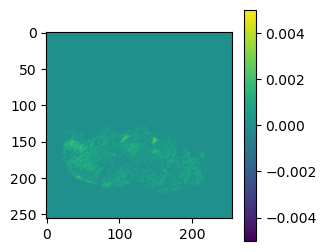

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


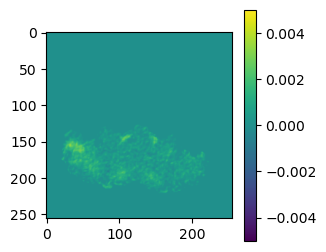

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


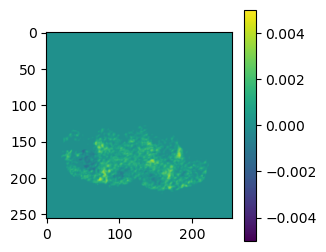

21820
234636
(21820, 234636)
(2520, 21820)
(3, 19)
(3, 234636)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


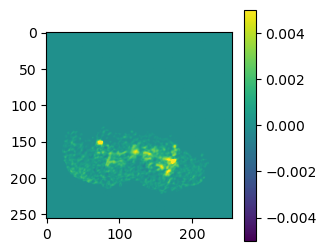

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


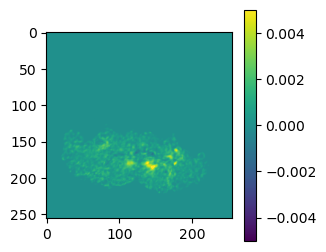

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


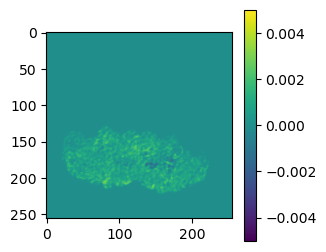

11754
127036
(11754, 127036)
(2520, 11754)
(3, 24)
(3, 127036)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


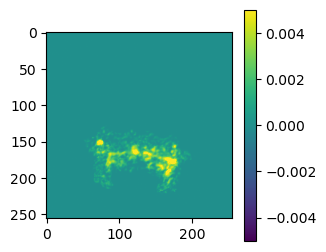

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


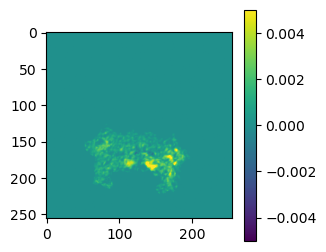

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_2_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


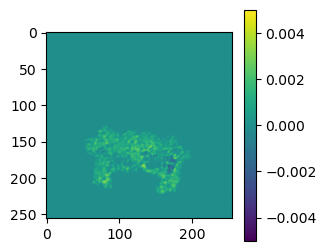

load atlas done! size:
(256, 256, 25)
10118
118290
(10118, 118290)
(2520, 10118)
(3, 32)
(3, 118290)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


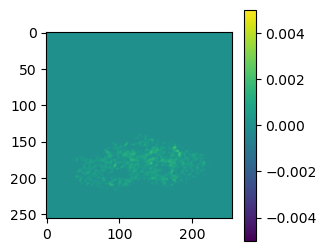

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


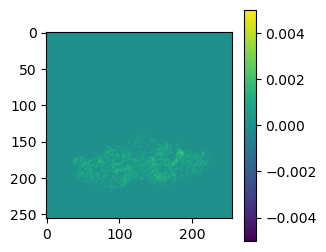

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


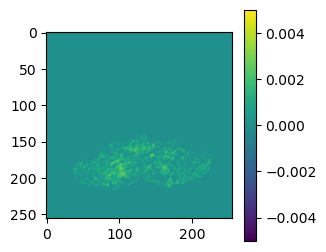

10118
118290
(10118, 118290)
(2520, 10118)
(3, 28)
(3, 118290)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


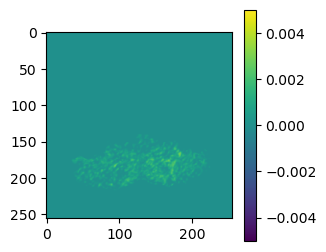

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


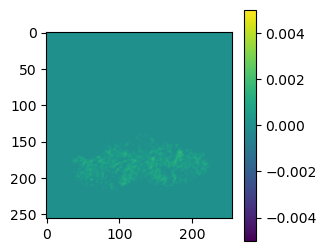

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


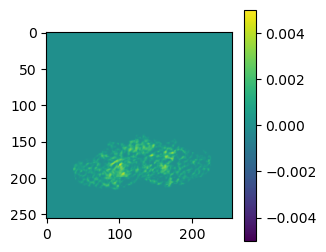

11514
117256
(11514, 117256)
(2520, 11514)
(3, 36)
(3, 117256)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


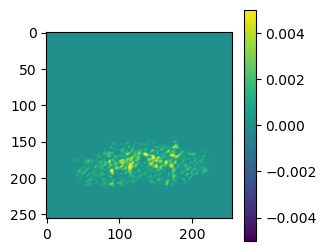

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


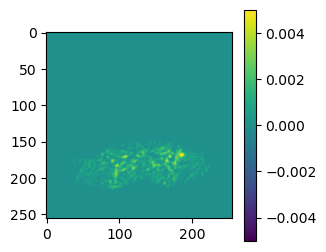

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


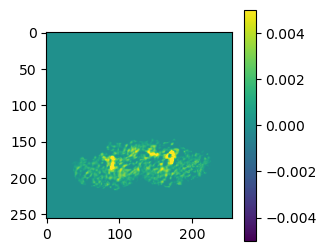

6644
70303
(6644, 70303)
(2520, 6644)
(3, 32)
(3, 70303)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


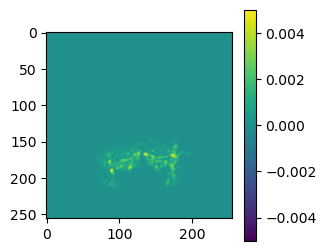

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


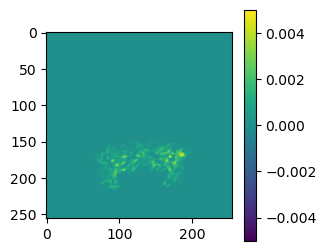

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_3_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


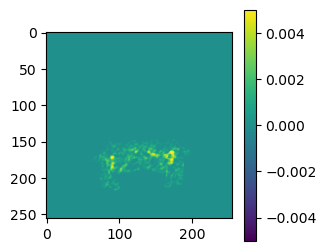

load atlas done! size:
(256, 256, 25)
10214
116421
(10214, 116421)
(2520, 10214)
(3, 41)
(3, 116421)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


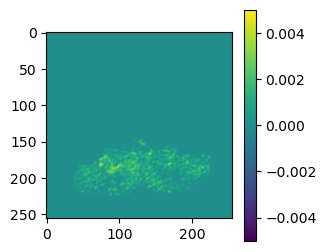

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


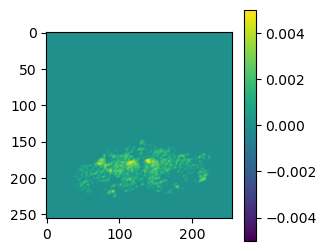

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


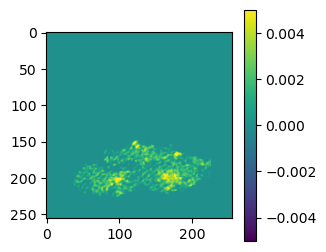

10214
116421
(10214, 116421)
(2520, 10214)
(3, 28)
(3, 116421)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


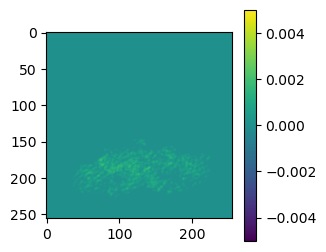

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


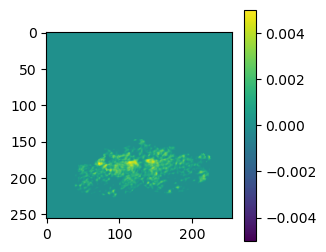

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


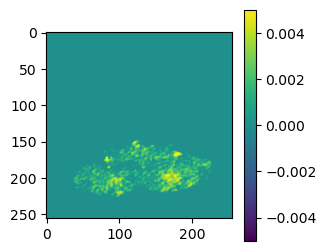

13972
115532
(13972, 115532)
(2520, 13972)
(3, 45)
(3, 115532)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


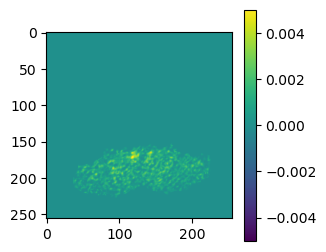

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


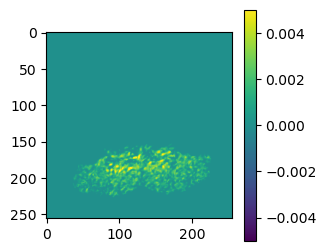

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


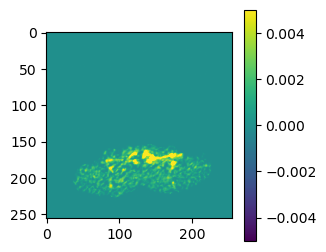

8027
69758
(8027, 69758)
(2520, 8027)
(3, 41)
(3, 69758)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


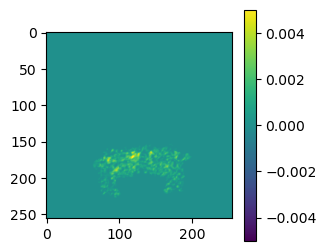

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


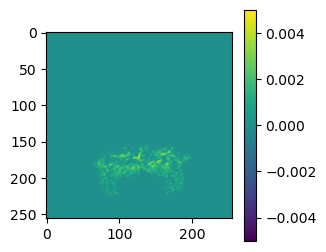

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_4_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


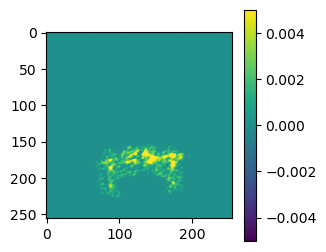

load atlas done! size:
(256, 256, 25)
10015
119328
(10015, 119328)
(2520, 10015)
(3, 41)
(3, 119328)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


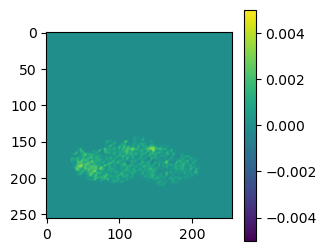

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


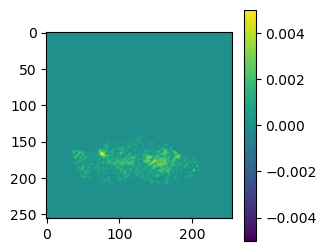

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


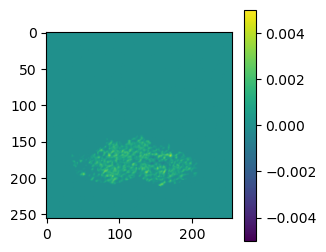

10015
119328
(10015, 119328)
(2520, 10015)
(3, 27)
(3, 119328)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


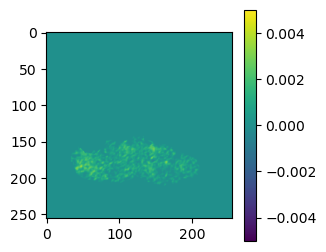

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


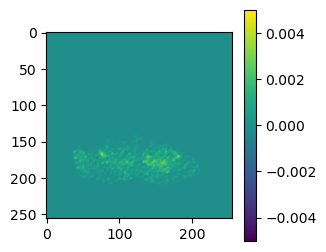

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


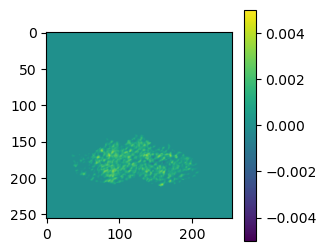

10920
118434
(10920, 118434)
(2520, 10920)
(3, 46)
(3, 118434)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


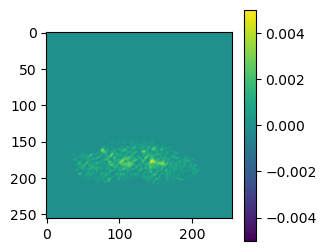

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


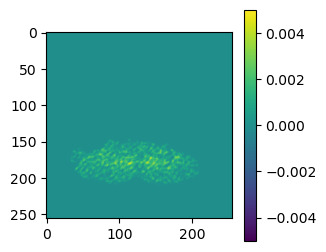

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


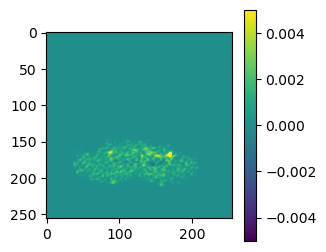

6663
70951
(6663, 70951)
(2520, 6663)
(3, 41)
(3, 70951)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


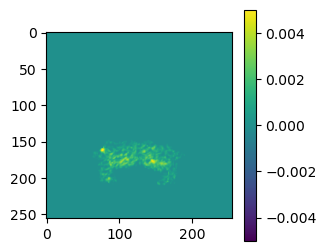

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


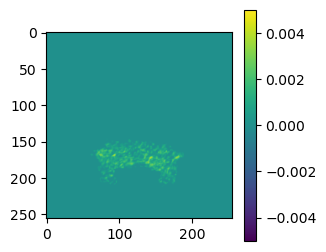

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_5_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


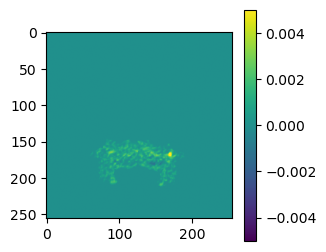

load atlas done! size:
(256, 256, 25)
10457
122730
(10457, 122730)
(2520, 10457)
(3, 43)
(3, 122730)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


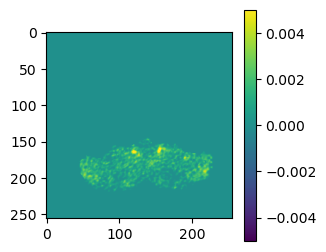

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


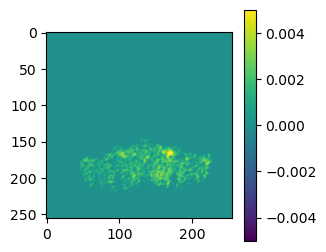

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


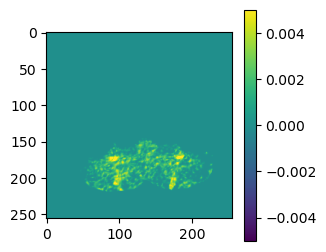

10457
122730
(10457, 122730)
(2520, 10457)
(3, 25)
(3, 122730)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


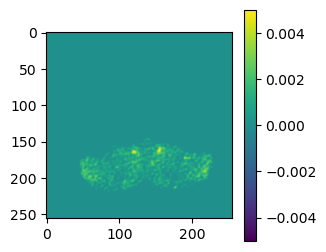

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


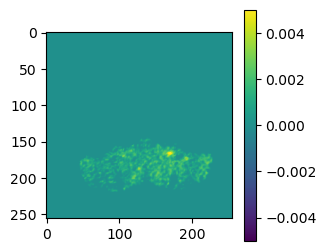

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


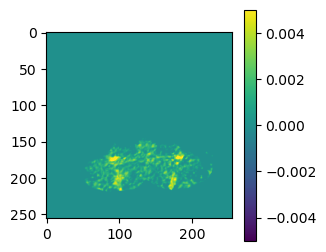

12010
121629
(12010, 121629)
(2520, 12010)
(3, 67)
(3, 121629)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


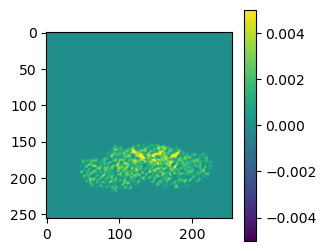

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


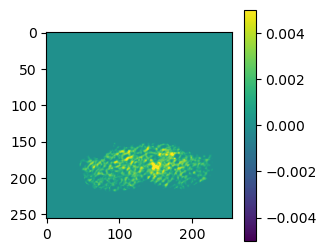

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


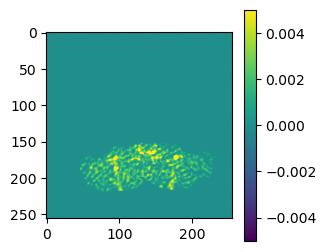

7282
70646
(7282, 70646)
(2520, 7282)
(3, 43)
(3, 70646)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


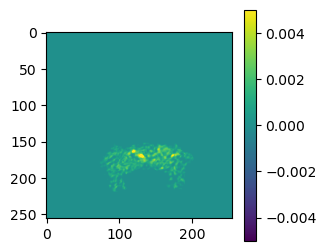

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


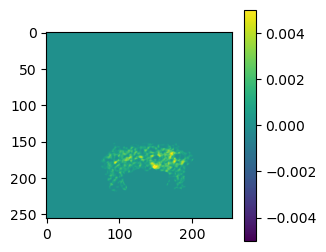

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 5Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_6_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


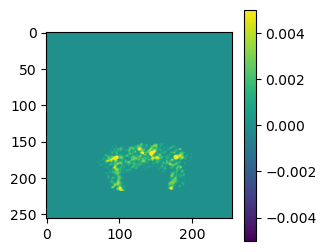

load atlas done! size:
(256, 256, 25)
11739
128411
(11739, 128411)
(2520, 11739)
(3, 45)
(3, 128411)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


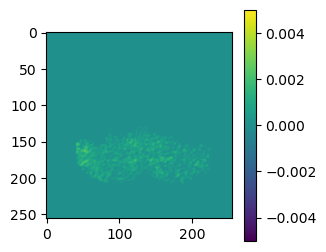

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


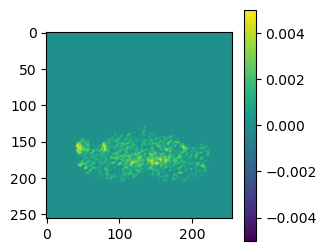

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


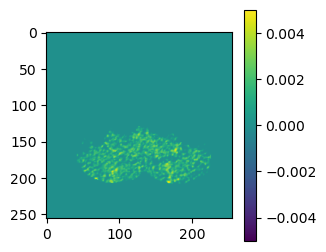

11739
128411
(11739, 128411)
(2520, 11739)
(3, 36)
(3, 128411)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


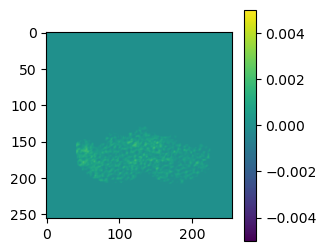

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


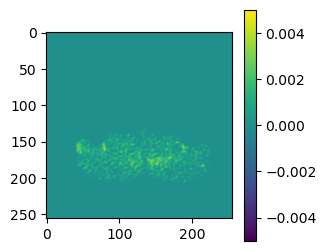

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


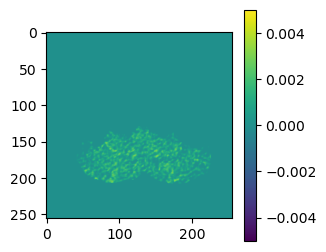

12657
127539
(12657, 127539)
(2520, 12657)
(3, 36)
(3, 127539)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


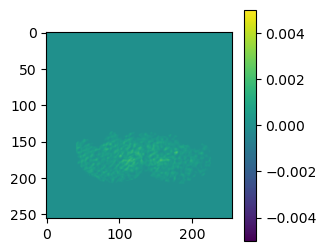

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


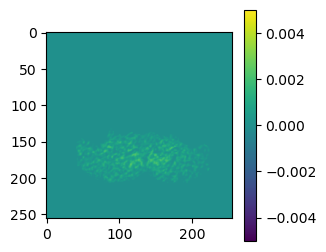

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


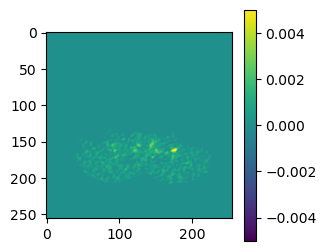

7113
68876
(7113, 68876)
(2520, 7113)
(3, 45)
(3, 68876)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


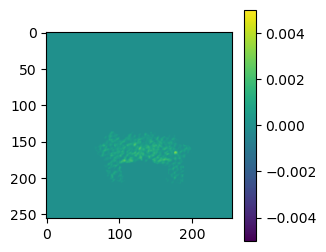

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


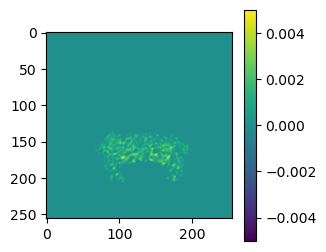

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_7_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


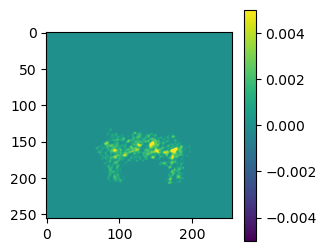

load atlas done! size:
(256, 256, 25)
10239
125074
(10239, 125074)
(2520, 10239)
(3, 96)
(3, 125074)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


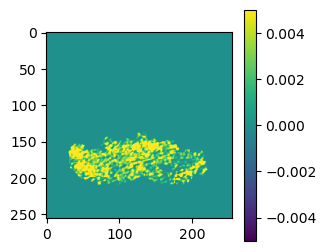

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


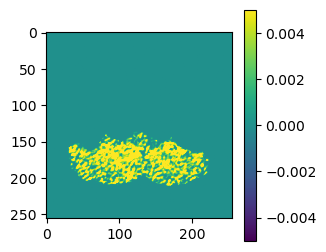

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


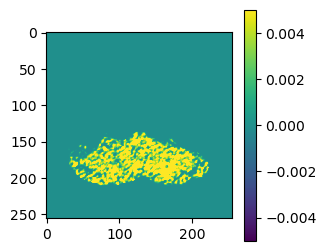

10239
125074
(10239, 125074)
(2520, 10239)
(3, 37)
(3, 125074)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


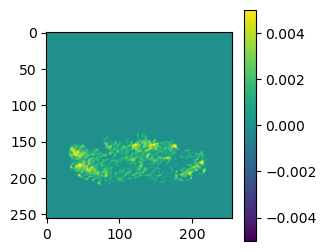

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


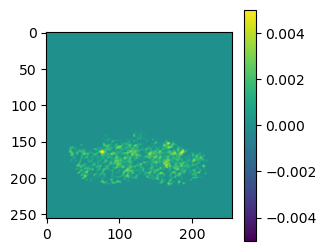

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


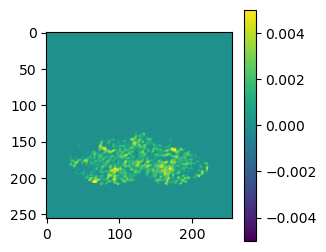

11964
123988
(11964, 123988)
(2520, 11964)
(3, 161)
(3, 123988)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


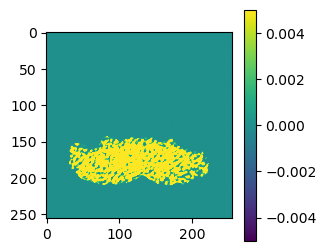

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


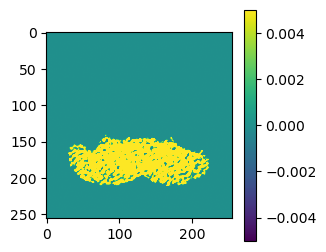

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


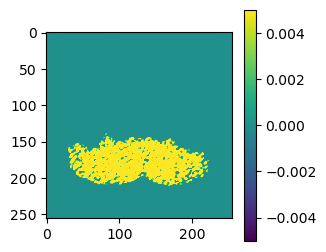

7240
71042
(7240, 71042)
(2520, 7240)
(3, 96)
(3, 71042)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


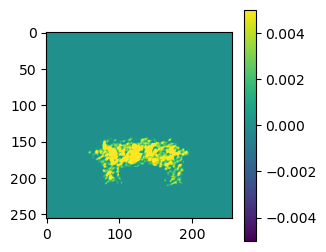

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


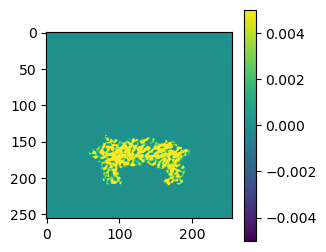

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_8_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


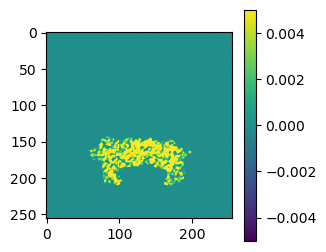

load atlas done! size:
(256, 256, 25)
12832
157508
(12832, 157508)
(2520, 12832)
(3, 35)
(3, 157508)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_0_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


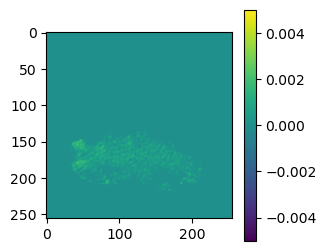

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_0_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


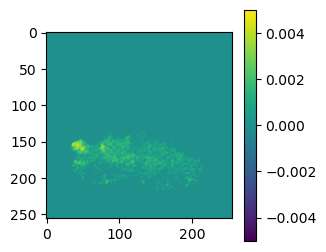

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_0_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


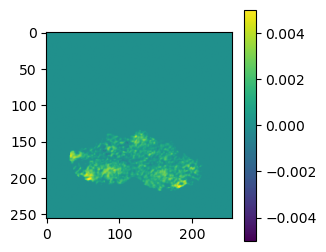

12832
157508
(12832, 157508)
(2520, 12832)
(3, 27)
(3, 157508)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_1_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


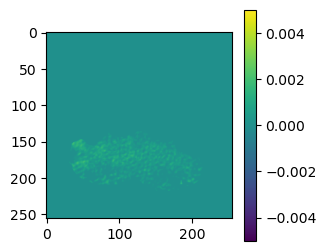

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_1_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


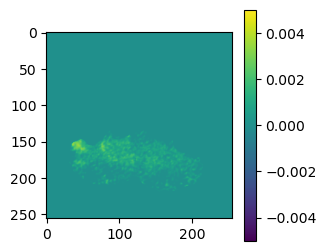

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_1_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


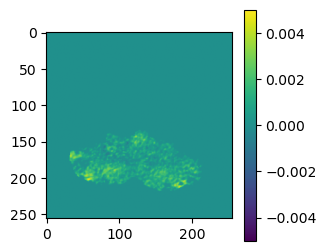

14446
156041
(14446, 156041)
(2520, 14446)
(3, 40)
(3, 156041)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_2_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


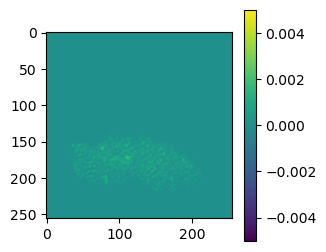

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_2_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


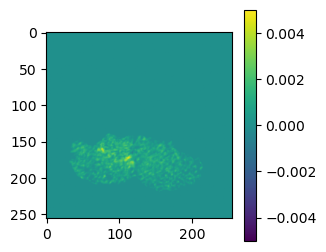

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_2_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


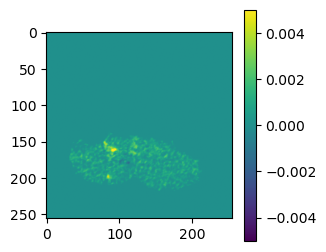

8656
89838
(8656, 89838)
(2520, 8656)
(3, 35)
(3, 89838)
Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_3_odor_0.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


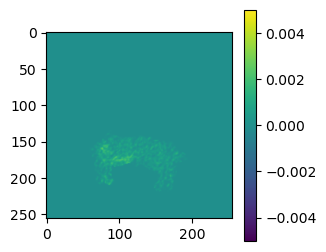

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_3_odor_1.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


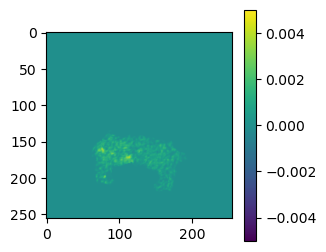

Row 0Done!
Row 1Done!
Row 2Done!
Row 3Done!
Row 4Done!
Row 9Done!
Row 10Done!


C:\Users\GTH\AppData\Local\Temp\ipykernel_44896\4075963339.py:157: UserWarning: ../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2/fly_9_channel_3_odor_2.tif is a low contrast image
  io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))


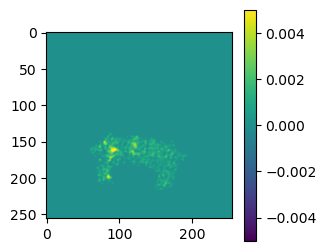

In [5]:
for fly_selected in fly_selected_list:
    # load atlas
    file_folder_1 = file_folder_list_1[fly_selected]
    file_folder_2 = file_folder_1[:-5]
    atlas= tf.imread(atlas_path + '/' + file_folder_2 + '/' + atlas_name)
    atlas = np.transpose(atlas,[1,2,0])
    atlas = atlas[:,:,atlas_z_range]
    print('load atlas done! size:')
    print(np.shape(atlas))
    # select brain region
    atlas_c1 = np.zeros_like(atlas)
    atlas_c2 = np.zeros_like(atlas)
    atlas_plus = np.zeros_like(atlas)
    for id in region_c1:
        atlas_c1[atlas==id] = id
    for id in region_c2:
        atlas_c2[atlas==id] = id
    for id in region_plus:
        atlas_plus[atlas==id] = id

    # process
    final_result_path = result_path+'/'+file_folders[fly_selected]+'/voxel-integration-region-SRD-long-formal-ew'
    for kk in channel_selected:
        if kk==1:
            files = find_files_with_prefix_and_type(final_result_path+'/channel_0', 'block_m_pca_channel_0', '.npy')
        elif kk==2:
            files = find_files_with_prefix_and_type(final_result_path+'/channel_'+str(kk), 'block_m_pca_channel_2', '.npy')
        elif kk==0:
            files = find_files_with_prefix_and_type(final_result_path+'/channel_'+str(kk), 'block_m_pca_channel_0', '.npy')
        else:
            files = find_files_with_prefix_and_type(final_result_path+'/channel_0', 'block_m_pca_channel_1', '.npy')
        # rearrange file order
        files_short = []
        for i in range(len(files)):
            file = files[i]
            a = file[-10:-4]
            if a[-2]=='_':
                a = a[:-1]+'0'+a[-1]
            if a[0]=='_':
                a = a[1:]
            files_short.append(a)
        arg = np.argsort(files_short)
        files = np.array(files)
        files = files[np.array(arg)]
        for i in range(len(files)):
            file = files[i]
            a = file[-32:]
            # print(a)

        # trans_mtx_1
        num_dim_after_block_pca = 0
        num_dim_before_block_pca = 0
        for i in range(len(files)):
            file = files[i]
            # print(file[-32:])
            a = np.load(file)
            # print(np.shape(a))
            num_dim_after_block_pca = num_dim_after_block_pca+np.size(a,0)
            num_dim_before_block_pca = num_dim_before_block_pca+np.size(a,1)
        print(num_dim_after_block_pca)
        print(num_dim_before_block_pca)

        trans_mtx_1 = np.zeros((num_dim_after_block_pca,num_dim_before_block_pca))
        idx = 0
        idy = 0
        for i in range(len(files)):
            file = files[i]
            a = np.load(file)
            trans_mtx_1[idx:idx+np.size(a,0),idy:idy+np.size(a,1)] = a
            idx = idx+np.size(a,0)
            idy = idy+np.size(a,1)
        print(np.shape(trans_mtx_1))
        # plt.figure(figsize = (10,10))
        # plt.imshow(trans_mtx_1,vmin = 0,vmax = 0.005)
        # # plt.colorbar()
        # plt.show()

        # trans_mtx_2
        if kk<3:
            all_m_pca_file = final_result_path+'/channel_'+str(kk)+'/all_m_pca.npy'
        else:
            all_m_pca_file = final_result_path+'/channel_0'+'/all_m_pca.npy'
        all_m_pca = np.load(all_m_pca_file)
        if kk<3:
            trans_mtx_2 = all_m_pca[:,0:num_dim_after_block_pca]
        else:
            trans_mtx_2 = all_m_pca[:,-num_dim_after_block_pca:]
        print(np.shape(trans_mtx_2))

        # trans_mtx
        # print(yy[fly_selected,1])
        if kk<3:
            lda_coef_file = final_result_path+'/channel_'+str(kk)+'/No_Shuffle/lda_coef_expr_thresh_'+str(yy[fly_selected,1])+'_fold_1.npy'
        else:
            lda_coef_file = final_result_path+'/channel_0'+'/No_Shuffle/lda_coef_expr_thresh_'+str(yy[fly_selected,1])+'_fold_1.npy'
        lda_coef = np.load(lda_coef_file)
        print(np.shape(lda_coef))
        trans_mtx = lda_coef@trans_mtx_2[0:np.size(lda_coef,1),:]@trans_mtx_1
        print(np.shape(trans_mtx))

        # trans_mtxx = trans_mtx_2@trans_mtx_1
        size_x = np.size(atlas,0)
        size_y = np.size(atlas,1)
        size_z = np.size(atlas,2)
        block_size_ratio = 0.1
        if kk==1:
            atlas_mask = atlas_c1>0
        elif kk==2:
            atlas_mask = atlas_c2>0
        elif kk==0:
            atlas_mask = atlas_c1>0
        else:
            atlas_mask = atlas_plus>0
        # pca for each block
        pca_size_xy = math.floor(size_x*block_size_ratio)
        pca_size_z = math.floor(size_z*block_size_ratio)
        num_block_xy = math.ceil(size_x/pca_size_xy)
        num_block_z = math.ceil(size_z/pca_size_z)
        for odor in range(np.size(trans_mtx,0)):
        # for odor in range(5):
            result_show = np.zeros(np.shape(atlas))
            flag = 0
            for i in range(num_block_xy):
                range_x = range(i*pca_size_xy,min((i+1)*pca_size_xy,size_x))
                mask_1 = atlas_mask[range_x,:,:]
                if np.sum(mask_1)==0:
                    print('Row ' + str(i) + 'Done!')
                    continue
                for j in range(num_block_xy):
                    range_y = range(j*pca_size_xy,min((j+1)*pca_size_xy,size_y))
                    mask_2 = mask_1[:,range_y,:]
                    if np.sum(mask_2)==0:
                        continue
                    for k in range(num_block_z):
                        range_z = range(k*pca_size_z,min((k+1)*pca_size_z,size_z))
                        mask = mask_2[:,:,range_z]
                        if np.sum(mask)==0:
                            continue
                        # print(str(i)+' '+str(j)+' '+str(k))
                        for idz in range_z:
                            for idy in range_y:
                                for idx in range_x:
                                    if atlas_mask[idx,idy,idz]:
                                        result_show[idx,idy,idz] = trans_mtx[odor,flag]
                                        flag = flag+1
            plt.figure(figsize = (3,3))
            plt.imshow(result_show.max(2),vmin = -0.005,vmax = 0.005)
            plt.colorbar()
            if if_save:
                figure_save_path = result_path + '/' + 'summary_2'
                folder = os.path.exists(figure_save_path)
                if not folder:
                    os.makedirs(figure_save_path)
                plt.savefig(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.png', dpi = 300)
                np.save(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.npy',result_show)
                result_show =np.transpose(result_show,[2,0,1])
                io.imsave(figure_save_path+'/'+'fly_'+str(fly_selected)+'_channel_'+str(kk)+'_odor_'+str(odor)+'.tif', ((result_show+1)*10000).astype(np.uint16))
            plt.show()
            # projection_3d(result_show,458,458,100,30,'coolwarm',[-0.002,0.005],0,True,False,[])


channel 0
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)


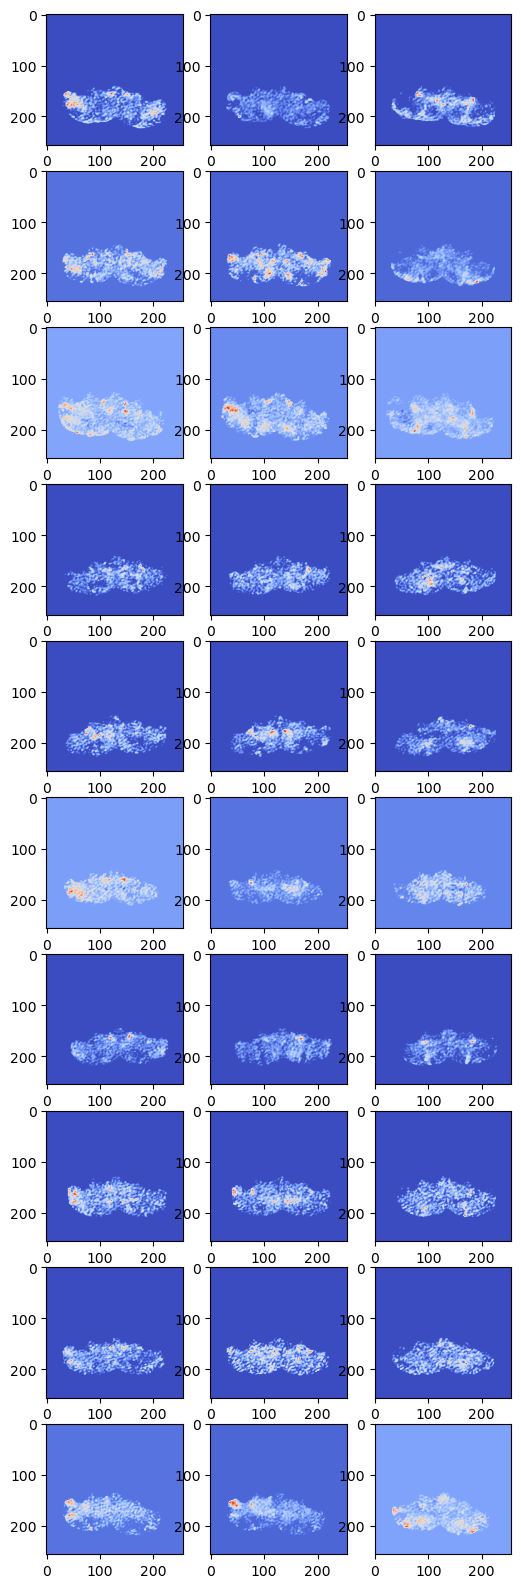

channel 1
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)


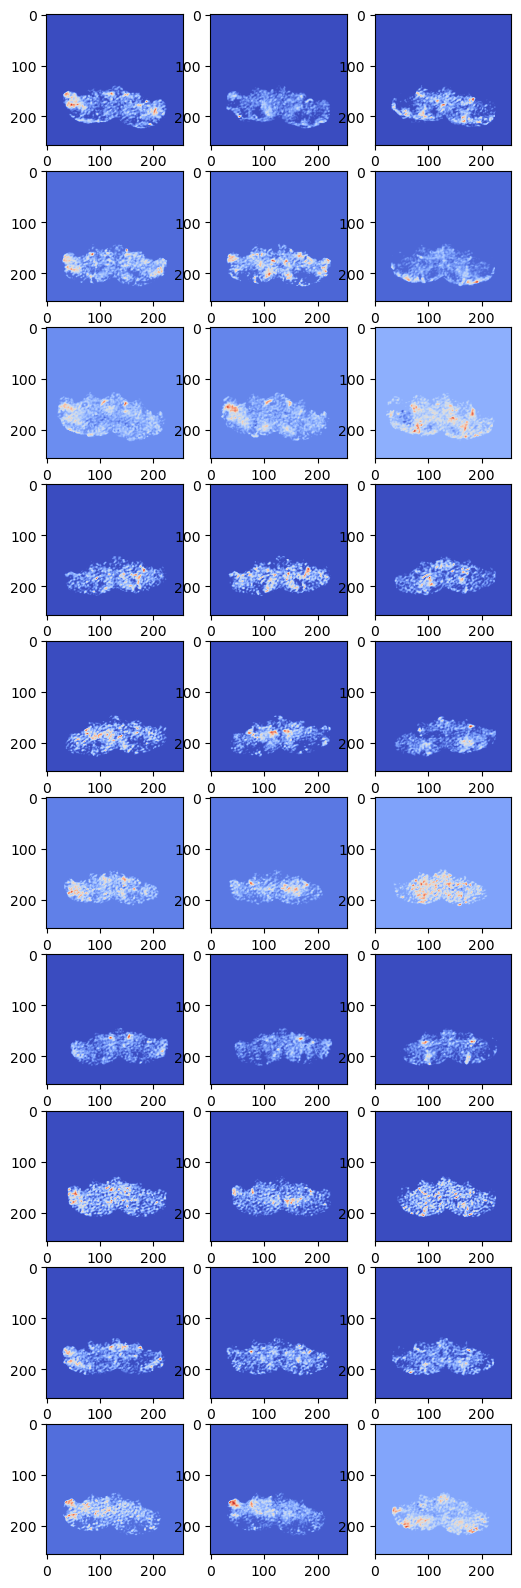

channel 2
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)


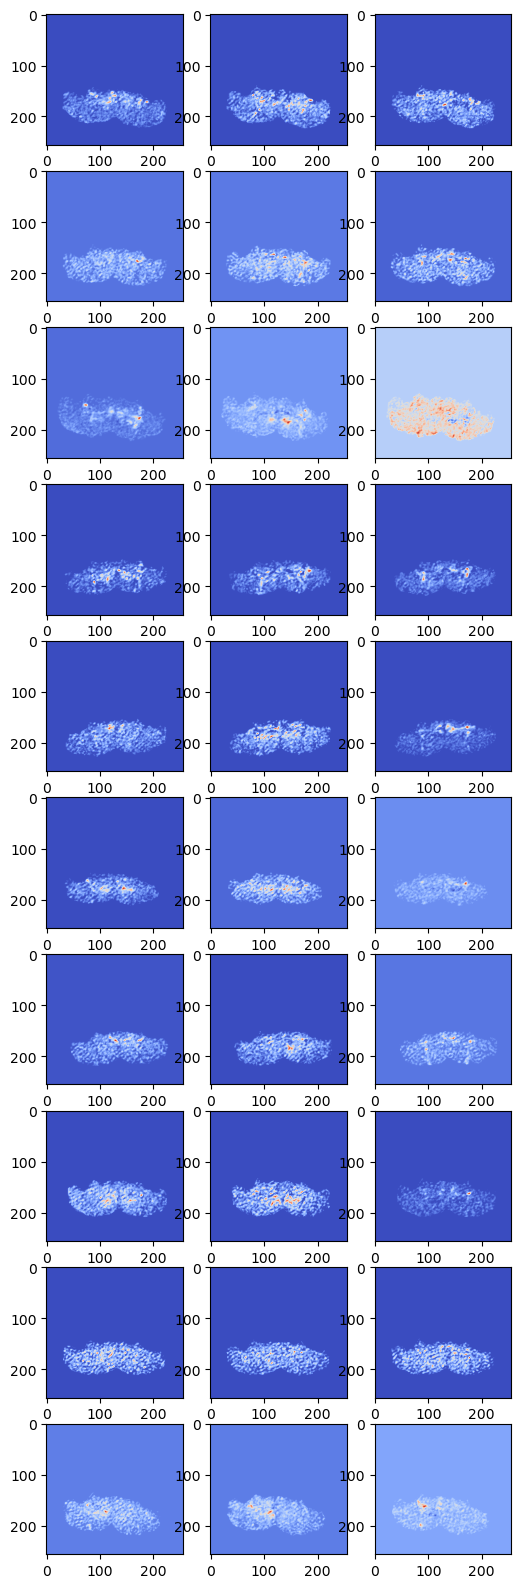

channel 3
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 0
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 1
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 2
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 3
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 4
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 5
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 6
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 7
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 8
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)
fly 9
(256, 256, 25)


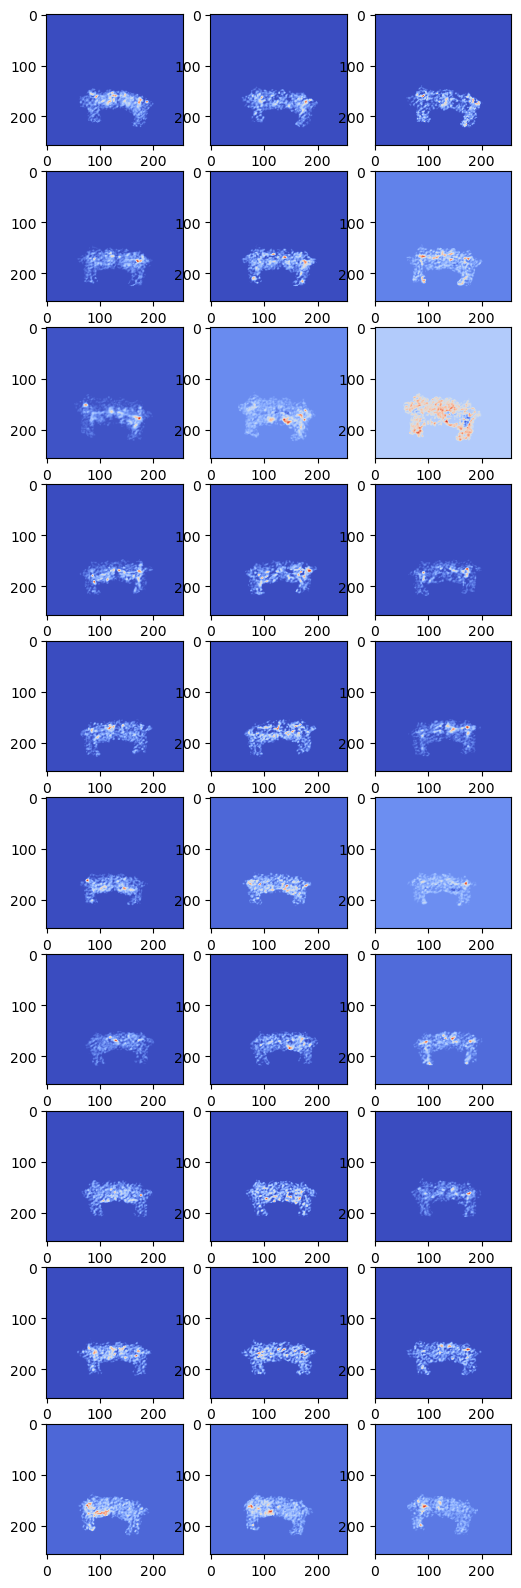

In [6]:
num_stim = 3
result_path = '../../../results/nsyb-G7f-rAch1h-ensemble_weight/summary_2'
fly_selected_list = [0,1,2,3,4,5,6,7,8,9]
num_fly = len(fly_selected_list)
for i in range(4):
    print('channel '+str(i))
    plt.figure(figsize = (6,20))
    for fly_selected in fly_selected_list:
        for j in range(num_stim):
            # load data
            data = np.load(result_path+'/fly_'+str(fly_selected)+'_channel_'+str(i)+'_odor_'+str(j)+'.npy')
            print('fly '+str(fly_selected))
            print(np.shape(data))
            plt.subplot(num_fly,num_stim,fly_selected*num_stim+j+1)
            the_map = data
            the_map_xy = the_map.max(2)
            # plt.imshow(the_map_xy,cmap = 'coolwarm',vmin = -0.005,vmax = 0.005,aspect = 'auto')
            plt.imshow(the_map_xy,cmap = 'coolwarm',aspect = 'auto')
            # projection_3d(the_map,458,458,100,30,'coolwarm',[-0.1,0.6],0,True,False,[])
    plt.savefig(figure_save_path+'/'+'channel_'+str(i+1)+'.png', dpi = 300)
    plt.show()
            